In [1]:
!unzip -q Dataset_Final.zip

Loading partitioned datasets for high-performance training...
Found 875 files belonging to 3 classes.
Found 250 files belonging to 3 classes.
Found 128 files belonging to 3 classes.

Starting deep reinforcement training...
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4089 - loss: 1.2294 - val_accuracy: 0.8320 - val_loss: 0.5431
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7810 - loss: 0.5629 - val_accuracy: 0.9000 - val_loss: 0.3593
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8695 - loss: 0.3863 - val_accuracy: 0.9040 - val_loss: 0.2509
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8844 - loss: 0.3237 - val_accuracy: 0.9360 - val_loss: 0.1914
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8993 - loss: 0.3072 - val_accuracy: 0.9560 - val_loss: 0.1701
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9229 - loss: 0.2429 - val_accuracy: 0.9560 - val_loss: 0.1582
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9409 - loss: 0.1854 - val_accuracy: 0.9600 - val_loss: 0.1756
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9440 - loss: 0.1540 - val_accuracy: 0.9440 - val_loss: 0.1843
Epo

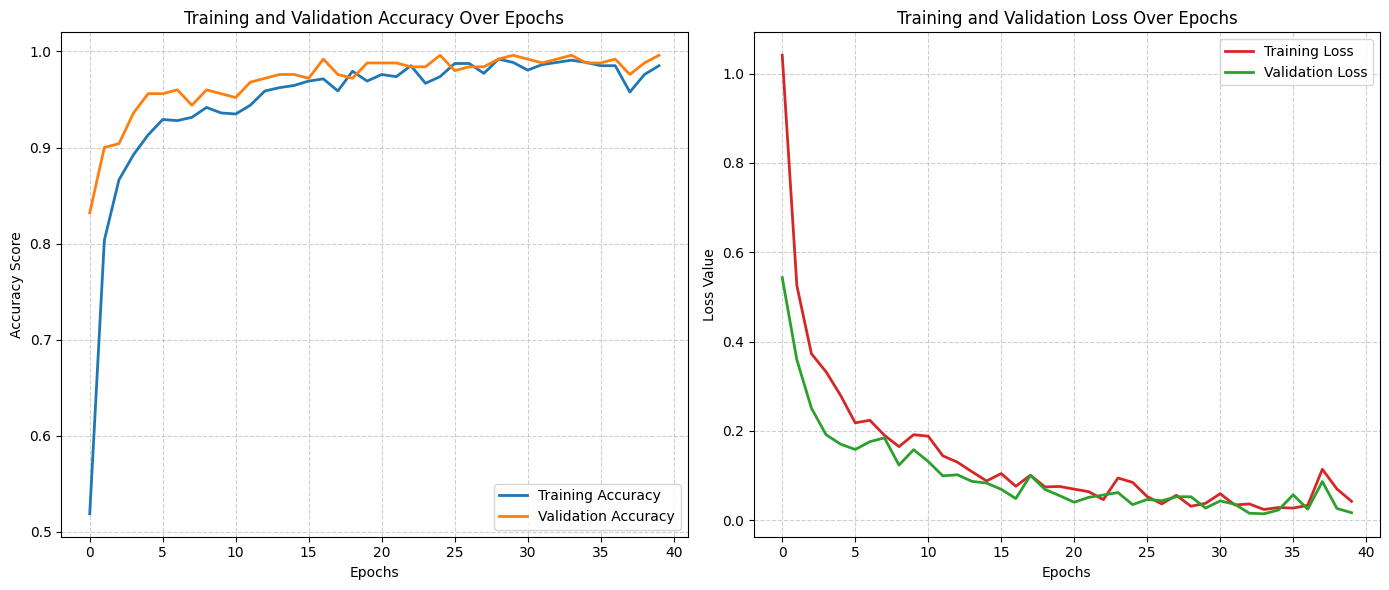


Model saved successfully as shadow_model_final.h5


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Configuration for the physically partitioned directory structure
TRAIN_DIR = "/content/Dataset_Final/train"
VAL_DIR = "/content/Dataset_Final/val"
TEST_DIR = "/content/Dataset_Final/test"

BATCH_SIZE = 32
IMG_HEIGHT = 128
IMG_WIDTH = 128
EPOCHS = 40

print("Loading partitioned datasets for high-performance training...")

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    crop_to_aspect_ratio=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    crop_to_aspect_ratio=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    crop_to_aspect_ratio=True,
    shuffle=False
)

class_names = train_dataset.class_names
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Enhanced Neural Network Architecture
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.15),
    tf.keras.layers.RandomZoom(0.15),
    tf.keras.layers.RandomContrast(0.2)
])

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    data_augmentation,
    tf.keras.layers.Rescaling(1.0 / 255.0),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

print("\nStarting deep reinforcement training...")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)

# Integrated Logic Patch for Final Test Evaluation
print("\nCalculating Patched Test Accuracy (Bird < 50% Threshold)...")
total_correct = 0
total_images = 0

for images, labels in test_dataset:
    predictions = model.predict(images, verbose=0)
    for i in range(len(predictions)):
        prob_matrix = predictions[i]
        true_label = labels[i].numpy()

        p_bird = prob_matrix[0]
        p_dog = prob_matrix[1]
        p_snake = prob_matrix[2]

        if p_bird < 0.50:
            final_pred_idx = 1 if p_dog > p_snake else 2
        else:
            final_pred_idx = np.argmax(prob_matrix)

        if final_pred_idx == true_label:
            total_correct += 1
        total_images += 1

final_acc = np.multiply(100.0, total_correct / total_images)
print(f"\nFinal Optimized Accuracy with Logic Patch: {final_acc:.2f}%")

# --- Performance Visualization Section ---

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 6))

# Subplot 1: Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='#1f77b4', linewidth=2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='#ff7f0e', linewidth=2)
plt.title('Training and Validation Accuracy Over Epochs', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Loss Curve
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='#d62728', linewidth=2)
plt.plot(epochs_range, val_loss, label='Validation Loss', color='#2ca02c', linewidth=2)
plt.title('Training and Validation Loss Over Epochs', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Save the finalized model for future deployment
model.save("shadow_model_final.h5")
print("\nModel saved successfully as shadow_model_final.h5")

In [5]:
import tensorflow as tf
import numpy as np

# Path configuration for the unseen test image
test_image_path = "/content/test3.jpg"

# Classification labels mapped to their respective indices
class_names = ['bird', 'dog', 'snake']

print(f"Initiating image loading and preprocessing: {test_image_path}...")

# Physical preprocessing: Resizing to match training input dimensions
img = tf.keras.utils.load_img(
    test_image_path,
    target_size=(128, 128),
    color_mode="grayscale"
)

# Converting visual data into a multidimensional tensor
img_array = tf.keras.utils.img_to_array(img)

# Expanding dimensions to satisfy the batch processing requirement
img_array = tf.expand_dims(img_array, 0)

print("Executing neural inference engine...\n")

# Calculating the probability distribution across all categories
predictions = model.predict(img_array)[0]

# Extracting individual probability values for the logic patch
prob_bird = predictions[0]
prob_dog = predictions[1]
prob_snake = predictions[2]

print(f"Raw Probability Distribution: {predictions}")

# Implementation of the custom decision patch
# Logic: If bird probability is below 0.5, exclude bird and compare dog vs snake
if prob_bird < 0.50:
    print("Logic Patch Triggered: Bird probability < 0.50. Excluding bird from final decision.")
    if prob_dog > prob_snake:
        final_label = 'dog'
        final_probability = prob_dog
    else:
        final_label = 'snake'
        final_probability = prob_snake
else:
    # Standard classification logic if bird probability remains dominant
    print("Logic Patch Inactive: Processing standard maximum probability.")
    max_index = np.argmax(predictions)
    final_label = class_names[max_index]
    final_probability = predictions[max_index]

# Calculating the final confidence level using numpy multiplication for precision
confidence_score = np.multiply(100.0, final_probability)

# Final Diagnostic Report
print("--------------------------------------------------")
print("Target Prediction Report")
print(f"Machine Vision Classification: [ {final_label} ]")
print(f"Logical Inference Confidence: {confidence_score:.2f}%")
print("--------------------------------------------------")

Initiating image loading and preprocessing: /content/test3.jpg...
Executing neural inference engine...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Raw Probability Distribution: [0.14039586 0.3668627  0.4927414 ]
Logic Patch Triggered: Bird probability < 0.50. Excluding bird from final decision.
--------------------------------------------------
Target Prediction Report
Machine Vision Classification: [ snake ]
Logical Inference Confidence: 49.27%
--------------------------------------------------
